In [70]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data.head()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
0,0,3.0,3.0,3.0,48,5.0,821,3.0,5.0,0,5.0,3.0,2.0,1
1,0,5.0,2.0,2.0,35,5.0,821,2.0,4.0,0,5.0,5.0,5.0,4
2,0,5.0,4.0,4.0,41,3.0,853,4.0,5.0,0,5.0,3.0,3.0,4
3,0,4.0,2.0,2.0,50,5.0,1905,2.0,5.0,0,4.0,5.0,5.0,4
4,0,5.0,3.0,3.0,49,3.0,3470,3.0,4.0,0,5.0,3.0,4.0,4


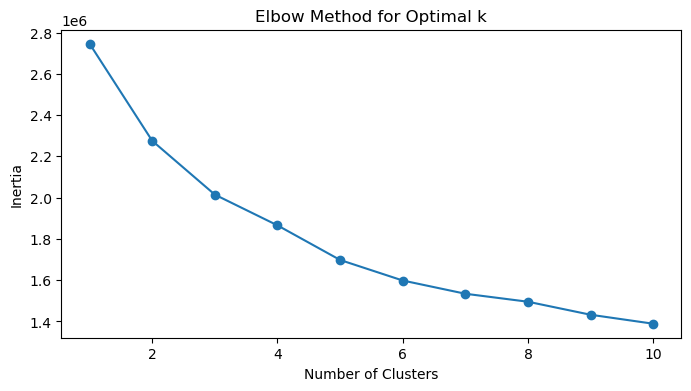

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Determine Optimal Number of Clusters
# Using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()



Cluster Profiles:
          Type of Travel  Online Boarding  In-flight Wifi Service  \
Cluster                                                            
0              0.099861         4.268317                4.137962   
1              0.380231         2.345699                2.168317   
2              0.057288         4.055853                4.146450   
3              0.138409         3.092057                2.171277   

         Ease of Online Booking        Age  In-flight Entertainment  \
Cluster                                                               
0                      4.084619  38.192935                 4.251678   
1                      2.361385  35.994006                 2.185257   
2                      4.257575  30.547017                 2.326990   
3                      2.028774  38.128261                 4.127482   

         Flight Distance  Departure and Arrival Time Convenience  \
Cluster                                                            
0        

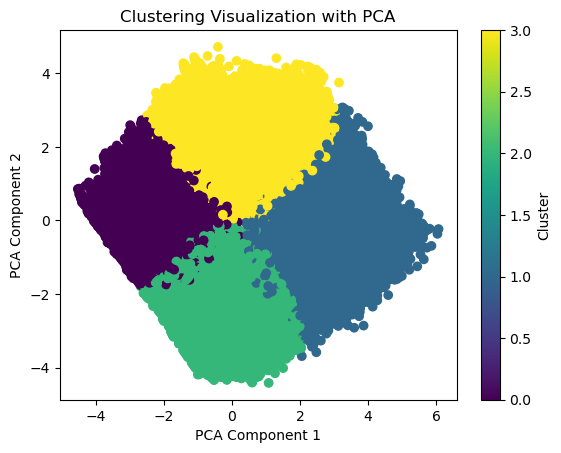

In [33]:
# Step 4: Fit K-Means with the chosen number of clusters
optimal_k = 4  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_original['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

Estimated number of clusters: 61
Estimated number of noise points: 10458
Silhouette Score: -0.20412949083284365
Cluster Profiles:
          Type of Travel  Online Boarding  In-flight Wifi Service  \
Cluster                                                            
0                   0.0         3.780232                3.345226   
1                   0.0         2.992800                3.000155   
2                   1.0         2.874684                2.571366   
3                   1.0         2.862226                2.496483   
4                   0.0         3.181628                3.128750   
...                 ...              ...                     ...   
56                  0.0         3.081642                4.939325   
57                  0.0         1.009042                4.000000   
58                  0.0         4.799445                4.804138   
59                  0.0         4.000000                4.000000   
60                  0.0         4.630756             

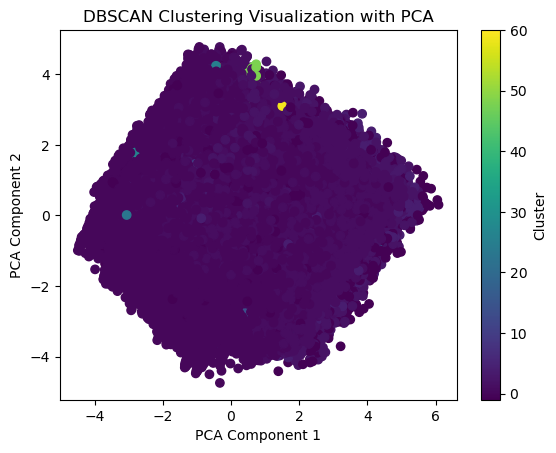

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Implement DBSCAN with adjusted parameters to reduce the number of clusters
    eps_value = 1.5  # Try increasing the eps value
min_samples_value = 10  # Try increasing min_samples to require more points per cluster

# Fit DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

# Calculate the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate Silhouette Score if there are more than one clusters
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")

# Step 4: Add Clustering Results to the Original Data
X_original['Cluster'] = labels
data['Cluster'] = labels

# Step 5: Analyze Cluster Profiles (ignoring noise points if present)
cluster_profiles = X_original[X_original['Cluster'] != -1].groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Optional: Visualize clustering results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

Estimated number of clusters: 5
Estimated number of noise points: 353
Silhouette Score: 0.33041925582757586
Cluster Profiles:
          Type of Travel  Online Boarding  In-flight Wifi Service  \
Cluster                                                            
0              0.174614         3.417400                3.121328   
1              0.000000         4.530283                4.101611   
2              0.000000         3.340747                1.002155   
3              1.000000         1.000000                1.000000   
4              0.000000         4.993006                4.993006   

         Ease of Online Booking        Age  In-flight Entertainment  \
Cluster                                                               
0                      3.145067  35.997693                 3.275084   
1                      4.101611  46.622449                 2.001705   
2                      1.002155  49.833333                 3.999884   
3                      1.000000  28.69230

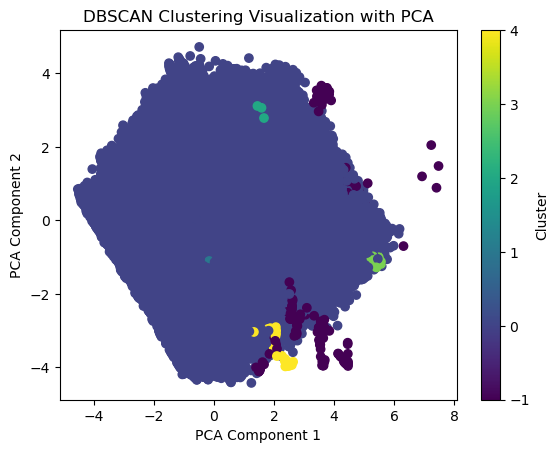

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Implement DBSCAN with adjusted parameters to reduce the number of clusters
eps_value = 3  # Try increasing the eps value
min_samples_value = 30  # Try increasing min_samples to require more points per cluster

# Fit DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

# Calculate the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate Silhouette Score if there are more than one clusters
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")

# Step 4: Add Clustering Results to the Original Data
X_original['Cluster'] = labels
data['Cluster'] = labels

# Step 5: Analyze Cluster Profiles (ignoring noise points if present)
cluster_profiles = X_original[X_original['Cluster'] != -1].groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Optional: Visualize clustering results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

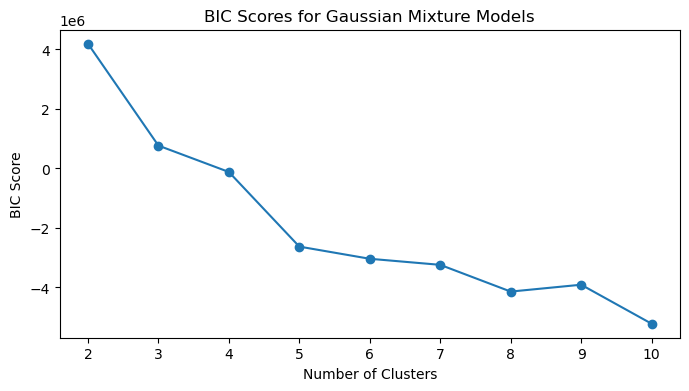

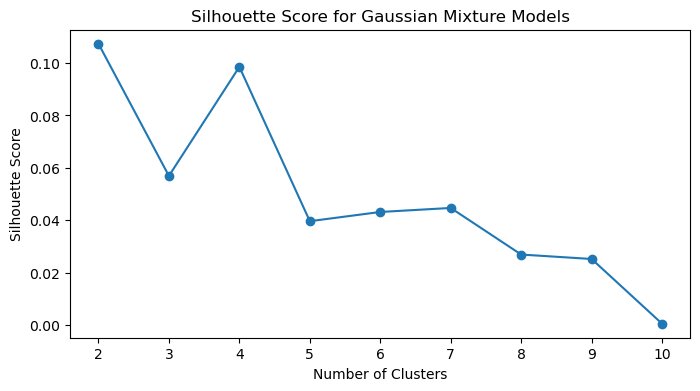

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Determine Optimal Number of Clusters using GMM
# Using Bayesian Information Criterion (BIC) and Silhouette Score
bic_scores = []
silhouette_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))  # BIC score for model evaluation
    silhouette_scores.append(silhouette_score(X_scaled, labels))  # Silhouette score for comparison

# Plot BIC Scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Gaussian Mixture Models')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Gaussian Mixture Models')
plt.show()



Cluster Profiles:
          Type of Travel  Online Boarding  In-flight Wifi Service  \
Cluster                                                            
0              0.000000         3.406999                3.407001   
1              0.000000         3.753543                3.007211   
2              0.000000         3.542104                3.119492   
3              1.000000         2.910734                2.586566   
4              0.377224         3.539196                3.204372   

         Ease of Online Booking        Age  In-flight Entertainment  \
Cluster                                                               
0                      3.406999  30.853127                 3.098496   
1                      3.105681  46.034271                 3.705441   
2                      3.108816  34.906774                 3.398187   
3                      2.629366  38.424036                 3.052511   
4                      3.201255  40.252669                 2.596823   

      

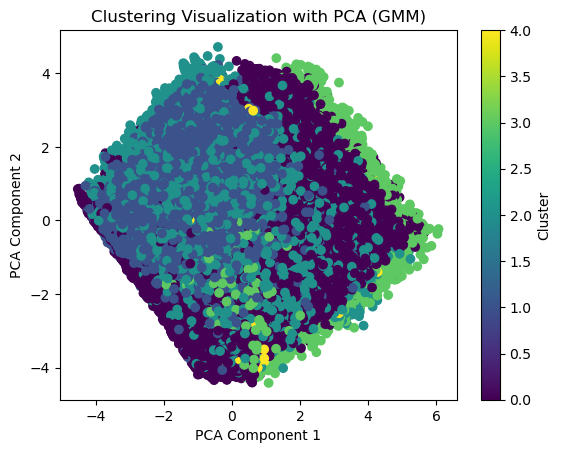

In [53]:
# Step 4: Fit GMM with the chosen number of clusters
optimal_k = 5  # Replace this with the chosen number of clusters based on BIC and Silhouette Score
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
X_original['Cluster'] = gmm.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA (GMM)')
plt.colorbar(label='Cluster')
plt.show()

In [61]:

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/feature_selected_data.csv')
data.head()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
0,0,3.0,3.0,3.0,48,5.0,821,3.0,5.0,0,5.0,3.0,2.0,1
1,0,5.0,2.0,2.0,35,5.0,821,2.0,4.0,0,5.0,5.0,5.0,4
2,0,5.0,4.0,4.0,41,3.0,853,4.0,5.0,0,5.0,3.0,3.0,4
3,0,4.0,2.0,2.0,50,5.0,1905,2.0,5.0,0,4.0,5.0,5.0,4
4,0,5.0,3.0,3.0,49,3.0,3470,3.0,4.0,0,5.0,3.0,4.0,4


In [63]:
data.describe()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
count,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000,211232.000000
mean,0.175158,3.417751,3.121572,3.145235,36.009071,3.273254,1046.467103,3.306624,3.286742,0.465895,3.212800,3.431926,3.365643,2.500000
std,0.380103,1.224791,1.269352,1.284451,14.165746,1.277813,869.410807,1.294444,1.281593,0.577186,1.263157,1.184414,1.201829,1.118037
min,0.000000,1.000000,1.000000,1.000000,7.000000,1.000000,31.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.402916,2.000000,2.000000,24.000000,2.000000,409.000000,2.000000,2.000000,0.000000,2.000000,2.988813,2.296779,1.750000
50%,0.000000,4.000000,3.000000,3.000000,35.000000,3.346008,787.000000,3.578372,3.425894,0.000000,3.000000,3.758861,3.495674,2.500000
75%,0.000000,4.240890,4.000000,4.000000,46.000000,4.000000,1346.000000,4.193152,4.000000,1.000000,4.000000,4.079266,4.081072,3.250000
max,1.000000,5.000000,5.000000,5.000000,85.000000,5.000000,4983.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,4.000000


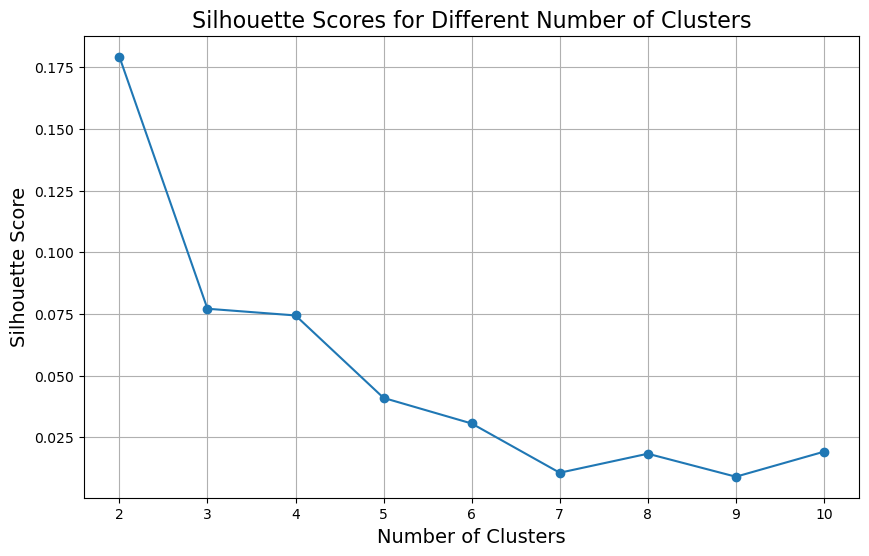

Optimal Number of Clusters: 2

Sample Data with Cluster Labels:
   Type of Travel  Online Boarding  In-flight Wifi Service  \
0               0              3.0                     3.0   
1               0              5.0                     2.0   
2               0              5.0                     4.0   
3               0              4.0                     2.0   
4               0              5.0                     3.0   

   Ease of Online Booking  Age  In-flight Entertainment  Flight Distance  \
0                     3.0   48                      5.0              821   
1                     2.0   35                      5.0              821   
2                     4.0   41                      3.0              853   
3                     2.0   50                      5.0             1905   
4                     3.0   49                      3.0             3470   

   Departure and Arrival Time Convenience  Seat Comfort  Class  Cleanliness  \
0                          

NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

In [65]:
# Step 2: Preprocessing
# Drop the 'Loyalty' column as it's the target variable and scale the features
features = data.drop(columns=['Loyalty'])
target = data['Loyalty']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Dimensionality reduction (optional, for visualization)
# Reduce to 2D for plotting purposes using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Step 4: Apply Gaussian Mixture Model
# Determine the optimal number of clusters using Silhouette Score
sil_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_labels = gmm.fit_predict(scaled_features)
    sil_score = silhouette_score(scaled_features, cluster_labels)
    sil_scores.append(sil_score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid()
plt.show()

# Optimal number of clusters
optimal_clusters = range_n_clusters[np.argmax(sil_scores)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

# Fit GMM with optimal clusters
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
cluster_labels = gmm.fit_predict(scaled_features)

# Step 5: Add cluster labels to the original dataset
data['Cluster'] = cluster_labels
print("\nSample Data with Cluster Labels:")
print(data.head())

# Step 6: Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=50
)
plt.title("Clusters Visualization (2D PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 7: Cluster Summary
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())

# Step 8: Evaluate Clustering Quality
print("\nSilhouette Score with Optimal Clusters:", silhouette_score(scaled_features, cluster_labels))

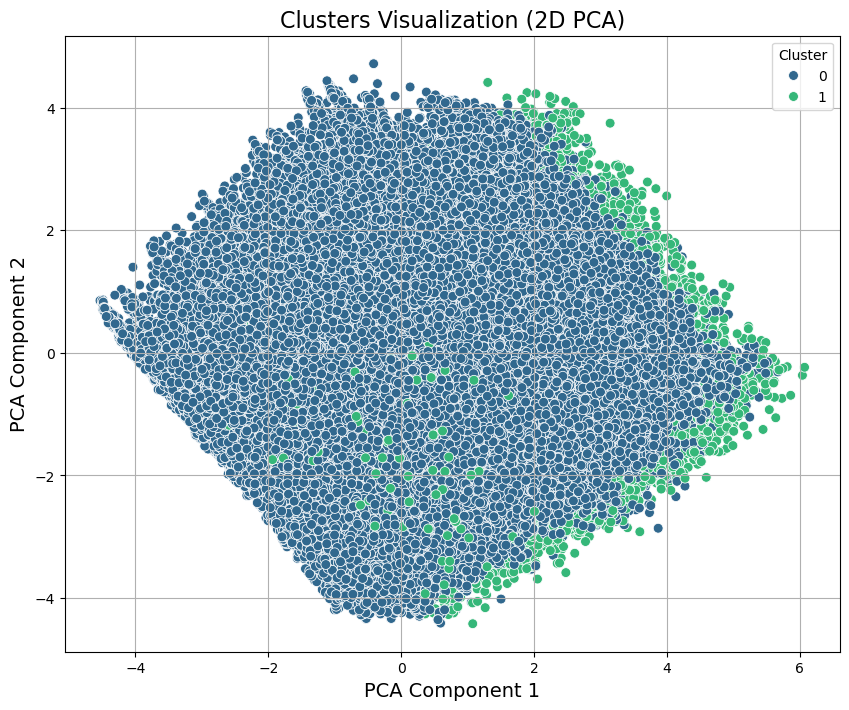


Cluster 0 Statistics:
       Type of Travel  Online Boarding  In-flight Wifi Service  \
count        174233.0    174233.000000           174233.000000   
mean              0.0         3.525045                3.235150   
std               0.0         1.196814                1.276008   
min               0.0         1.000000                1.000000   
25%               0.0         2.796298                2.000000   
50%               0.0         4.000000                3.003984   
75%               0.0         4.452707                4.117649   
max               0.0         5.000000                5.000000   

       Ease of Online Booking            Age  In-flight Entertainment  \
count           174233.000000  174233.000000            174233.000000   
mean                 3.254686      35.497386                 3.320435   
std                  1.289326      13.006640                 1.248916   
min                  1.000000       7.000000                 1.000000   
25%              

In [67]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 6: Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=50
)
plt.title("Clusters Visualization (2D PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 7: Cluster Summary
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())

# Step 8: Evaluate Clustering Quality
print("\nSilhouette Score with Optimal Clusters:", silhouette_score(scaled_features, cluster_labels))


Sample Data with Cluster Labels:
   Type of Travel  Online Boarding  In-flight Wifi Service  \
0               0              3.0                     3.0   
1               0              5.0                     2.0   
2               0              5.0                     4.0   
3               0              4.0                     2.0   
4               0              5.0                     3.0   

   Ease of Online Booking  Age  In-flight Entertainment  Flight Distance  \
0                     3.0   48                      5.0              821   
1                     2.0   35                      5.0              821   
2                     4.0   41                      3.0              853   
3                     2.0   50                      5.0             1905   
4                     3.0   49                      3.0             3470   

   Departure and Arrival Time Convenience  Seat Comfort  Class  Cleanliness  \
0                                     3.0           5.0  

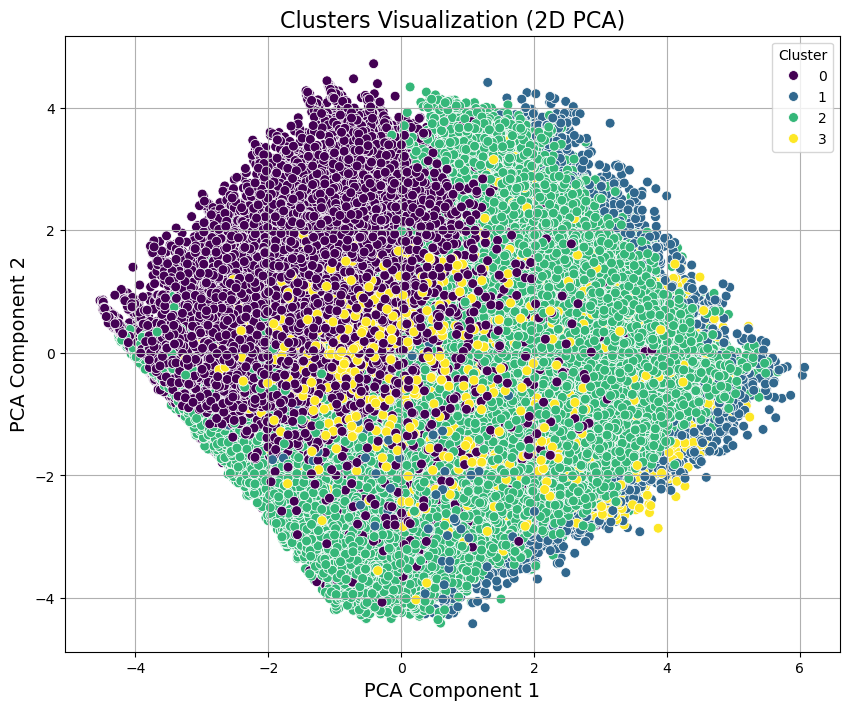


Cluster 0 Statistics:
       Type of Travel  Online Boarding  In-flight Wifi Service  \
count         57218.0     57218.000000            57218.000000   
mean              0.0         3.866660                2.958374   
std               0.0         1.076568                1.342179   
min               0.0         1.000000                1.000000   
25%               0.0         3.000000                2.000000   
50%               0.0         4.000000                3.000000   
75%               0.0         5.000000                4.000000   
max               0.0         5.000000                5.000000   

       Ease of Online Booking           Age  In-flight Entertainment  \
count            57218.000000  57218.000000             57218.000000   
mean                 3.102337     42.897392                 3.768451   
std                  1.366005     12.209540                 1.135650   
min                  1.000000      7.000000                 1.000000   
25%                  2

In [68]:

# Fit GMM with optimal clusters
gmm = GaussianMixture(n_components=4, random_state=42)
cluster_labels = gmm.fit_predict(scaled_features)

# Step 5: Add cluster labels to the original dataset
data['Cluster'] = cluster_labels
print("\nSample Data with Cluster Labels:")
print(data.head())

# Step 6: Visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_features[:, 0], 
    y=reduced_features[:, 1], 
    hue=cluster_labels, 
    palette='viridis', 
    s=50
)
plt.title("Clusters Visualization (2D PCA)", fontsize=16)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Step 7: Cluster Summary
for cluster in range(optimal_clusters):
    print(f"\nCluster {cluster} Statistics:")
    cluster_data = data[data['Cluster'] == cluster]
    print(cluster_data.describe())

# Step 8: Evaluate Clustering Quality
print("\nSilhouette Score with Optimal Clusters:", silhouette_score(scaled_features, cluster_labels))

In [77]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Force the number of clusters to 4
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(x)  # X is your dataset

# Predict the cluster labels
labels = gmm.predict(X)
x['Cluster'] = labels

# Evaluate the new clustering
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, labels)
print(f'Silhouette Score with 4 Clusters: {silhouette}')

NameError: name 'x' is not defined